# Feature Extraction from Lidar

We analyze the data from the Lidar to find simple geomatric features like lines or circles.

We must answer questions like:

* how many lines are there
* which point belongs to which line
* what are the characteristics of this line

## Field-of-View (FoV)

Our simulated Lidar provides a view of 360 degrees, to extract fearures we will restrict or fied of view to a direction $\theta$ and a range specified in degrees. Our FoV if then $\theta$ plus/minus the range

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from LidarSim.lidar_sim import LidarSimulator

In [11]:
lidar = LidarSimulator("square.stl")
point = [500, 300]
yaw = np.radians(0)
plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)
triangles = lidar.get_env_triangles(point[0], point[1], yaw)

In [12]:
def get_fov(theta, view_range, scan, resolution):
    idx = np.searchsorted(scan[:, 0], theta) - 1
    idx_max = int(idx + view_range/resolution)
    idx_min = int(idx - view_range/resolution)
    if idx_max <= scan.shape[0] and idx_min >=0:
        return scan[idx_min:idx_max]
    if idx_min < 0:
        return np.roll(scan, -idx_min, axis = 0)[:2*int(view_range/resolution)]
    if idx_max > scan.shape[0]:
        return np.roll(scan, -(idx_max - scan.shape[0]), axis = 0)[-2*int(view_range/resolution):]

In [13]:
fov = get_fov(np.radians(14), 15, plot_scan, lidar.resolution)

Text(0.5, 1.0, 'Lidar Scann with FoV')

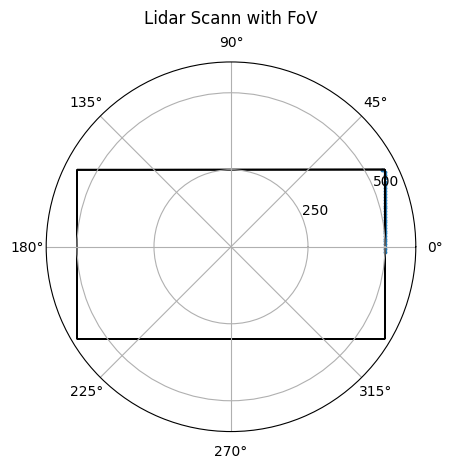

In [14]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(fov[:, 0], fov[:, 1], s=3.0)
for t in triangles:
    ax.fill(t[:, 0],t[:, 1],fill=False)
ax.set_rmax(600)
ax.set_rticks([250, 500])  # Less radial ticks
ax.grid(True)

ax.set_title("Lidar Scann with FoV", va='bottom')

## FoV and LidarSimulator module

This is an example how to set the Fow when calling the LidarSimulator module

In [17]:
lidar = LidarSimulator("square.stl")
point = [500, 300]
yaw = np.radians(0)
plot_scan = lidar.get_lidar_points(point[0], point[1], yaw, theta=np.radians(90), view_range=30)
triangles = lidar.get_env_triangles(point[0], point[1], yaw)

Text(0.5, 1.0, 'Lidar Scann with FoV')

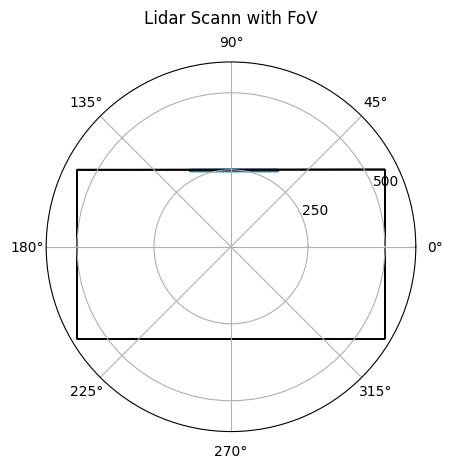

In [18]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(plot_scan[:, 0], plot_scan[:, 1], s=3.0)
for t in triangles:
    ax.fill(t[:, 0],t[:, 1],fill=False)
ax.set_rmax(600)
ax.set_rticks([250, 500])  # Less radial ticks
ax.grid(True)

ax.set_title("Lidar Scann with FoV", va='bottom')